In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

In [2]:
def synth_plot(df, ax = None, logged = False, split_uw = False):

    df = df.iloc[:-1]
    
    # set split_uw = True to plot the unweighted mean of obs and models on its own line
    if not ax: fig, ax = plt.subplots(dpi = 100)
    
    gcols = {"obs" : "blue", 
             "obs_synth" : "blue", 
             "models" : "red", 
             "model_synth" : "red",
             "synth" : "magenta",
             "unweighted" : "lightgrey"}
    
    ylabels = df.model.to_list()
    
    ax.grid(axis = "x", which = "major", color = "k", alpha = 0.1)
    
    if logged:
        ax.set_xscale('log')
        ax.axvline(1, ls = "--", color = "k", zorder = -99)
    else:
        ax.axvline(0, ls = "--", color = "k", zorder = -99)
    
    for k in range(len(df)):

        r = df.iloc[k]
        ax.add_patch(Rectangle((r.lower,-k-0.4), r.upper - r.lower, 0.8, facecolor = gcols[r.name], alpha = 0.5 + 0.5*("synth" in r.name)))
        ax.plot(r.est, -k, color = "k", marker = "v")
        ax.add_patch(Rectangle((r.l_wb,-k-0.4), r.u_wb - r.l_wb, 0.8, edgecolor = "k", facecolor = "none", lw = 1.5))

    ax.set_yticks(range(0, -len(ylabels), -1))
    ax.set_yticklabels(ylabels)

In [6]:
def synth_miniplot(df1, df2, ax = None, logged = False, split_uw = False):

    df = pd.concat([df1.loc[["obs_synth", "model_synth", "synth"],:],
                    df2.loc[["model_synth"],:]])
    df.index = ["obs_synth", "model_synth", "synth", "model_proj"]
    
    # set split_uw = True to plot the unweighted mean of obs and models on its own line
    if not ax: fig, ax = plt.subplots(dpi = 100)
    
    gcols = {"obs" : "blue", 
             "obs_synth" : "blue", 
             "models" : "red", 
             "model_synth" : "red",
             "synth" : "magenta",
             "unweighted" : "lightgrey",
             "model_proj" : "darkred"}
    
    ylabels = df.model.to_list()
    
    ax.grid(axis = "x", which = "major", color = "k", alpha = 0.1)
    
    if logged:
        ax.set_xscale('log')
        ax.axvline(1, ls = "--", color = "k", zorder = -99)
    else:
        ax.axvline(0, ls = "--", color = "k", zorder = -99)
    
    for k in range(len(df)):

        r = df.iloc[k]
        ax.add_patch(Rectangle((r.lower,-k-0.4), r.upper - r.lower, 0.8, facecolor = gcols[r.name], alpha = 0.5 + 0.5*("synth" in r.name)))
        ax.plot(r.est, -k, color = "k", marker = "v")
        ax.add_patch(Rectangle((r.l_wb,-k-0.4), r.u_wb - r.l_wb, 0.8, edgecolor = "k", facecolor = "none", lw = 1.5))

    ax.set_yticks(range(0, -len(ylabels), -1))
    ax.set_yticklabels(ylabels)    

# Synthesis plots

In [4]:
synth_attr_dI = pd.read_csv("synth/synth-pi_gmst+amo_gmst-effect_attr_abs.csv", index_col = "group")
synth_attr_PR = pd.read_csv("synth/synth-pi_gmst+amo_gmst-effect_attr_pr.csv", index_col = "group")

synth_proj_dI = pd.read_csv("synth/synth-pi_gmst+amo_gmst-effect_proj_abs.csv", index_col = "group")
synth_proj_PR = pd.read_csv("synth/synth-pi_gmst+amo_gmst-effect_proj_pr.csv", index_col = "group")

Text(0.5, 1.0, '(b) Probability ratio')

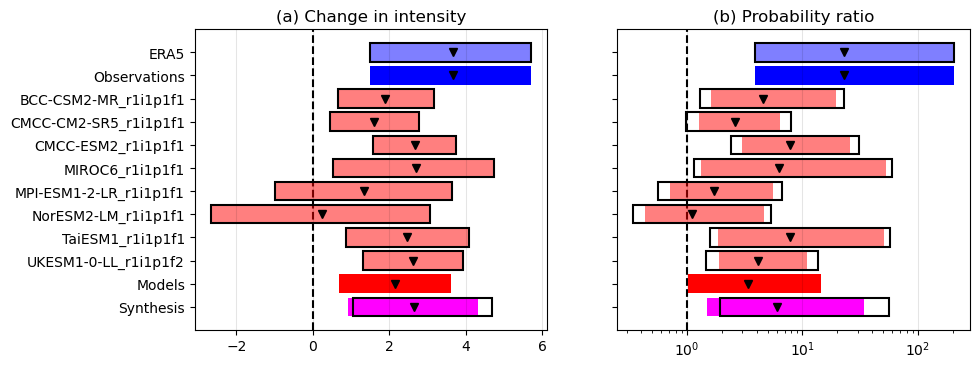

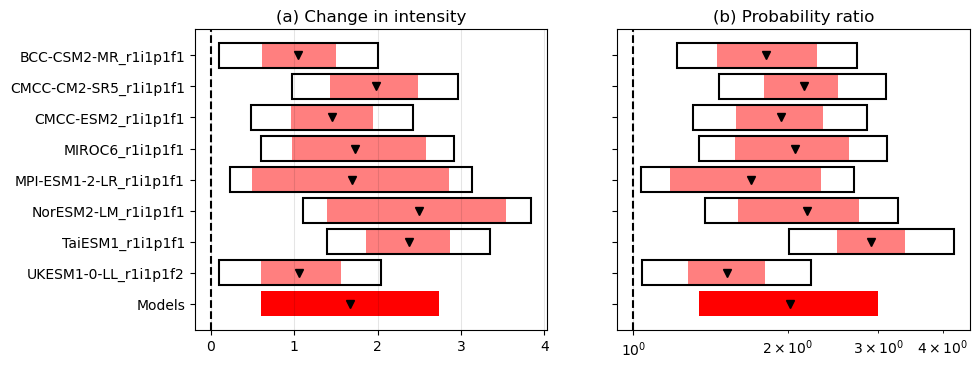

In [24]:
fig, axs = plt.subplots(ncols = 2, sharey = True, figsize = (10,len(synth_attr_dI)*0.3))
plt.subplots_adjust(hspace = 0.1)

synth_plot(synth_attr_dI, ax = axs[0])
axs[0].set_title("(a) Change in intensity")

synth_plot(synth_attr_PR, ax = axs[1], logged = True)
axs[1].set_title("(b) Probability ratio")


fig, axs = plt.subplots(ncols = 2, sharey = True, figsize = (10,len(synth_attr_dI)*0.3))
plt.subplots_adjust(hspace = 0.1)

synth_plot(synth_proj_dI, ax = axs[0])
axs[0].set_title("(a) Change in intensity")

synth_plot(synth_proj_PR, ax = axs[1], logged = True)
axs[1].set_title("(b) Probability ratio")


# plt.suptitle("Synthesised changes in "+varnm+" ("+{"attr" : "Past-present", "proj" : "Present-future"}[period]+")")

# if varnm+"-"+period in xlim_pr.keys():
#     axs[1].set_xlim(xlim_pr[varnm+"-"+period])

# plt.savefig("fig/synth-plot_proj_"+varnm+"_"+models)

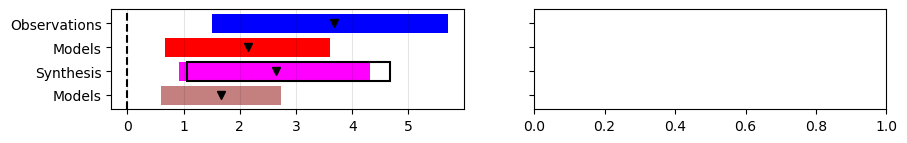

In [7]:
fig, axs = plt.subplots(ncols = 2, sharey = True, figsize = (10,len(synth_attr_dI)*0.1))
plt.subplots_adjust(hspace = 0.1)

synth_miniplot(synth_attr_dI, synth_proj_dI, ax = axs[0])
# synth_miniplot(synth_attr_PR, ax = axs[1], logged = True)

# fig, axs = plt.subplots(ncols = 2, sharey = True, figsize = (10,len(synth_attr_dI)*0.1))
# synth_miniplot(synth_proj_dI, ax = axs[0])

In [8]:
df = synth_proj_dI

In [9]:
df

,Unnamed: 0,model,est,lower,upper,l_wb,u_wb
group,,,,,,,
models,3,BCC-CSM2-MR_r1i1p1f1,1.047686,0.610632,1.500581,0.100141,2.002641
models,4,CMCC-CM2-SR5_r1i1p1f1,1.981356,1.427697,2.490099,0.974697,2.964028
models,5,CMCC-ESM2_r1i1p1f1,1.456871,0.957377,1.944006,0.478955,2.428532
models,6,MIROC6_r1i1p1f1,1.724002,0.976763,2.577149,0.599195,2.921786
models,7,MPI-ESM1-2-LR_r1i1p1f1,1.693572,0.493964,2.862097,0.228688,3.133112
models,8,NorESM2-LM_r1i1p1f1,2.492008,1.390692,3.544374,1.106467,3.838967
models,9,TaiESM1_r1i1p1f1,2.375900,1.862607,2.866695,1.390864,3.349402
models,10,UKESM1-0-LL_r1i1p1f2,1.061674,0.601195,1.564285,0.103099,2.041186
model_synth,11,Models,1.667520,0.600735,2.734877,NaN,NaN


In [20]:
[re.findall("synth", i) for i in df.index]

[[], [], [], [], [], [], [], [], ['synth'], []]

In [19]:
?re.findall

Signature: re.findall(pattern, string, flags=0)
Docstring:
Return a list of all non-overlapping matches in the string.

If one or more capturing groups are present in the pattern, return
a list of groups; this will be a list of tuples if the pattern
has more than one group.

Empty matches are included in the result.
File:      ~/miniforge3/envs/wwa/lib/python3.13/re/__init__.py
Type:      function

In [13]:
import re